In [2]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.4 MB/s eta 0:00:00a 0:00:01


In [3]:
import pandas as pd

# Загрузка данных, пропуская первую строку (заголовок)
volumes = pd.read_excel('/kaggle/input/da-rzhd/transportation_volumes.xls', header=None, skiprows=1)

# Заполнение NaN пустыми строками для корректного объединения
volumes = volumes.fillna('')

# Объединение значений второй и третьей строки, чтобы создать заголовки
new_headers = volumes.iloc[0].astype(str) + ' ' + volumes.iloc[1].astype(str)

# Применение новых заголовков
volumes.columns = new_headers

# Удаление строк, использованных для создания заголовков
volumes = volumes.drop([0, 1]).reset_index(drop=True)

# Удалить лишние пробелы из названий столбцов
volumes.columns = volumes.columns.str.strip()

# Сохранение уникальных ID
unique_ids = volumes['ID'].unique()

# Проверка результата
print(volumes.head())


      ID Субъект федерации отп  Субъект федерации наз Код груза  \
0  21220     Рязанская область   Оренбургская область     39146   
1    912     Кировская область    Саратовская область     32411   
2    912     Кировская область        Приморский край     32411   
3    912     Кировская область  Удмуртская Республика     32411   
4    912     Кировская область   Оренбургская область     32411   

  Месяц Гр груза по опер.номен 2022/08 Провозная плата  \
0                       МЕТИЗЫ                       0   
1               ЧЕРНЫЕ МЕТАЛЛЫ                       0   
2               ЧЕРНЫЕ МЕТАЛЛЫ                  675705   
3               ЧЕРНЫЕ МЕТАЛЛЫ                       0   
4               ЧЕРНЫЕ МЕТАЛЛЫ                       0   

  2022/08 Объем перевозок(тн) 2023/10 Провозная плата  \
0                           0                       0   
1                           0                       0   
2                         203                       0   
3                   

In [4]:
# Группируем данные по 'ID' и суммируем все денежные показатели, начиная с 5-го столбца
summed_volumes = volumes.groupby('ID').sum().iloc[:, 4:]

# Создание DataFrame для удобного отображения результата
result_volumes = summed_volumes.reset_index()

# Отображение результата
print(result_volumes)

        ID 2022/08 Провозная плата 2022/08 Объем перевозок(тн)  \
0        9                       0                           0   
1       25                 2243274                        5616   
2       33                13666447                        4753   
3       86                       0                           0   
4      115                 7681607                        2970   
..     ...                     ...                         ...   
951  21725                       0                           0   
952  21726                       0                           0   
953  21727                       0                           0   
954  21728                       0                           0   
955  21729                       0                           0   

    2023/10 Провозная плата 2023/10 Объем перевозок(тн)  \
0                         0                           0   
1                   2578495                        6460   
2                  12396634   

In [5]:
# Сохранение результирующего DataFrame в Excel файл
result_file_path = "/kaggle/working/summed_volumes_by_id.xlsx"
result_volumes.to_excel(result_file_path, index=False)

In [6]:
# Разделение столбцов на провозную плату и объем перевозок
freight_columns = [col for col in result_volumes.columns if "Провозная плата" in col]
tonnage_columns = [col for col in result_volumes.columns if "Объем перевозок" in col]

# Сортировка столбцов по дате, извлекая из имени столбца информацию о дате
sorted_freight_columns = sorted(freight_columns, key=lambda x: pd.to_datetime(x.split()[0], format="%Y/%m"))
sorted_tonnage_columns = sorted(tonnage_columns, key=lambda x: pd.to_datetime(x.split()[0], format="%Y/%m"))

# Создание нового DataFrame с нужным порядком столбцов
sorted_columns = ['ID'] + sorted_freight_columns + sorted_tonnage_columns
volumes_sorted = result_volumes[sorted_columns]

# Сохранение результата в новый файл или использование отсортированных данных для анализа
volumes_sorted.to_excel("/kaggle/working/sorted_volumes_by_date.xlsx", index=False)

# Отображение первых строк для проверки
volumes_sorted.head()


,ID,2022/01 Провозная плата,2022/02 Провозная плата,2022/03 Провозная плата,2022/04 Провозная плата,2022/05 Провозная плата,2022/06 Провозная плата,2022/07 Провозная плата,2022/08 Провозная плата,2022/09 Провозная плата,...,2023/11 Объем перевозок(тн),2023/12 Объем перевозок(тн),2024/01 Объем перевозок(тн),2024/02 Объем перевозок(тн),2024/03 Объем перевозок(тн),2024/04 Объем перевозок(тн),2024/05 Объем перевозок(тн),2024/06 Объем перевозок(тн),2024/07 Объем перевозок(тн),2024/08 Объем перевозок(тн)
0,9,0,0,0,0,0,0,0,0,155364,...,0,0,0,0,0,0,0,0,0,50
1,25,1833430,1986327,2130880,2474585,2081455,3286550,2863569,2243274,2352663,...,7284,5675,3224,3760,3800,6296,4441,5530,6841,8015
2,33,8391136,9859024,9205997,10782588,9835553,18380073,17302701,13666447,8084979,...,4079,4169,5229,5021,4727,6330,5274,4919,4634,5329
3,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,115,5091833,6576660,6802046,9907326,7867965,5868940,6983278,7681607,14858867,...,4960,5935,3210,6911,8270,10131,5789,5877,6604,4677


In [7]:
volumes_sorted.loc[:, 'Отток'] = (volumes_sorted.filter(like='Провозная плата').T.rolling(window=12).sum().T.min(axis=1) == 0) | \
                                 (volumes_sorted.filter(like='Объем перевозок(тн)').T.rolling(window=12).sum().T.min(axis=1) == 0)
print(volumes_sorted.columns)

Index(['ID', '2022/01 Провозная плата', '2022/02 Провозная плата',
       '2022/03 Провозная плата', '2022/04 Провозная плата',
       '2022/05 Провозная плата', '2022/06 Провозная плата',
       '2022/07 Провозная плата', '2022/08 Провозная плата',
       '2022/09 Провозная плата', '2022/10 Провозная плата',
       '2022/11 Провозная плата', '2022/12 Провозная плата',
       '2023/01 Провозная плата', '2023/02 Провозная плата',
       '2023/03 Провозная плата', '2023/04 Провозная плата',
       '2023/05 Провозная плата', '2023/06 Провозная плата',
       '2023/07 Провозная плата', '2023/08 Провозная плата',
       '2023/09 Провозная плата', '2023/10 Провозная плата',
       '2023/11 Провозная плата', '2023/12 Провозная плата',
       '2024/01 Провозная плата', '2024/02 Провозная плата',
       '2024/03 Провозная плата', '2024/04 Провозная плата',
       '2024/05 Провозная плата', '2024/06 Провозная плата',
       '2024/07 Провозная плата', '2024/08 Провозная плата',
       '2022/01 Об


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
interests = pd.read_excel('/kaggle/input/da-rzhd/interests.xls')

# Просмотр первых строк для проверки успешной загрузки
interests.head()

,Дата,Тема,Сценарий,Состояние,ID,Подразделение,Ожидаемая выручка,"Вероятность сделки, %",Дата следующей активности,Следующая активность,Канал первичного интереса,Номер,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)
0,01.02.2023 07:26,Привлечение потенциального клиента.,1.Продажа ЦФТО,Завершен неудачно,17369,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022043,"Интерес ""Привлечение потенциального клиента."" ..."
1,01.02.2023 07:31,Привлечение клиента,1.Продажа ЦФТО,Завершен неудачно,13714,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022053,"Интерес ""Привлечение клиента"" от 01.02.2023"
2,01.02.2023 07:45,Привлечение потенциального клиента ст. Подосин...,1.Продажа ЦФТО,Завершен неудачно,14984,ЦПУ МУРАШИ,NaN,NaN,NaN,NaN,10. Холодный звонок,0001-022069,"Интерес ""Привлечение потенциального клиента ст..."
3,01.02.2023 08:22,"Перевозка с Владимира - МСК, Ярославль",1.Продажа ЦФТО,Завершен неудачно,14916,ЦПУ ВЛАДИМИР,NaN,NaN,NaN,NaN,Обращение,0001-022106,"Интерес ""Перевозка с Владимира - МСК, Ярославл..."
4,01.02.2023 08:37,Привлечение потенциальных клиентов,1.Продажа ЦФТО,Завершен неудачно,14257,ЦПУ ШАХУНЬЯ,NaN,NaN,13.03.2023 14:30:00,звонок,10. Холодный звонок,0001-022115,"Интерес ""Привлечение потенциальных клиентов"" о..."


In [9]:
# Проверка на наличие пропущенных значений в столбце 'Дата'
missing_dates_count = interests['Дата'].isna().sum()

# Вывод количества пропущенных значений в 'Дата'
print(f"Количество пропущенных значений в столбце 'Дата': {missing_dates_count}")


Количество пропущенных значений в столбце 'Дата': 0


In [10]:
#Аналитический модуль для того, чтобы менеджер по продажам мог работать с компаниями,
#которые недавно проявляли интерес, но не купили за 3 месяца после проявленного интереса
#То есть наглядная аналитика оттока по разделу "Интересы"
# Фильтрация совпадений по ID и выбор нужных столбцов
matches_in_interests = interests[interests['ID'].isin(unique_ids)][['ID', 'Дата', 'Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)']]

# Преобразование формата даты в "год/месяц"
matches_in_interests['Дата'] = pd.to_datetime(matches_in_interests['Дата'], errors='coerce').dt.strftime('%Y/%m')

# Задание списка нужных дат
filtered_dates = ['2024/06', '2024/07', '2024/08']

# Фильтрация строк, содержащих указанные даты
recent_matches_in_interests = matches_in_interests[matches_in_interests['Дата'].isin(filtered_dates)]

# Вывод отфильтрованных данных
recent_matches_in_interests.head()



,ID,Дата,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)
2550,19679,2024/06,"Интерес ""перевозка пшеницы Красный узел-Новоро..."
2570,7214,2024/06,"Интерес """"РЖД Маркет"""" от 06.02.2024"
2575,5641,2024/06,"Интерес """"РЖД Маркет"""" от 06.02.2024"
2614,12225,2024/06,"Интерес ""Привлечение клиента на новое направле..."
2619,13906,2024/06,"Интерес ""Привлечениеклиента на новое направлен..."


In [11]:
#Продолжение аналитического модуля, где мы рассматриваем активность за 3 месяца
#по объему отгрузки и оплате за грузоперевозку. Здесь реально жесткий код;3 Главное работает
import pandas as pd

# Загрузите данные recent_matches_in_interests и volumes_sorted
# recent_matches_in_interests = pd.read_excel('/path/to/recent_matches_in_interests.xlsx')
# volumes_sorted = pd.read_excel('/path/to/volumes_sorted.xlsx')

# Создаем список для хранения отфильтрованных обращений
filtered_matches = []

# Итерация по обращениям
for _, row in recent_matches_in_interests.iterrows():
    # Получаем дату обращения
    appeal_date = pd.to_datetime(row['Дата'], format='%Y/%m')
    
    # Получаем соответствующий ID клиента
    client_id = row['ID']

    # Получаем данные по данному клиенту из volumes_sorted
    client_data = volumes_sorted[volumes_sorted['ID'] == client_id]
    
    # Если данных по клиенту нет, пропускаем обращение
    if client_data.empty:
        continue
    
    # Проверяем объем перевозок в зависимости от месяца обращения
    if appeal_date == pd.Timestamp('2024-06-01'):
        columns_to_check = ['2024/06 Объем перевозок(тн)', '2024/07 Объем перевозок(тн)', '2024/08 Объем перевозок(тн)']
    elif appeal_date == pd.Timestamp('2024-07-01'):
        columns_to_check = ['2024/07 Объем перевозок(тн)', '2024/08 Объем перевозок(тн)']
    elif appeal_date == pd.Timestamp('2024-08-01'):
        columns_to_check = ['2024/08 Объем перевозок(тн)']
    else:
        # Если дата не в интересующем диапазоне, пропускаем
        continue

    # Проверяем, что объемы перевозок в указанных столбцах равны нулю
    if (client_data[columns_to_check].values == 0).all():
        # Добавляем обращение в отфильтрованный список
        filtered_matches.append(row)

# Создаем DataFrame из отфильтрованных обращений
filtered_matches_df = pd.DataFrame(filtered_matches)

# Объединяем отфильтрованные обращения с volumes_sorted
merged_data = pd.merge(filtered_matches_df, volumes_sorted, on='ID', how='inner')

# Сохраняем результат в Excel для скачивания
output_path = "/kaggle/working/merged_data.xlsx"
merged_data.to_excel(output_path, index=False)
print(f"Результаты сохранены в файл merged_data.xlsx")



Результаты сохранены в файл merged_data.xlsx


In [13]:
for_train_interests = interests[interests['ID'].isin(unique_ids)][['ID', 'Дата', 'Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)','Состояние']]

In [14]:
for_train_interests

,ID,Дата,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта),Состояние
15,10078,01.02.2023 13:09,"Интерес ""Разъяснительная работа по действующим...",Завершен неудачно
17,12889,01.02.2023 14:08,"Интерес ""Услуга Аренда локомотива ОАО «РЖД»"" о...",Завершен неудачно
26,12170,01.02.2023 16:28,"Интерес ""услуга Грузовой экспресс"" от 01.02.2023",Завершен неудачно
47,17715,01.02.2024 11:07,"Интерес ""Привлечение клиента к новой услуге на...",Заключение договора
52,11318,01.02.2024 11:57,"Интерес """"РЖД Маркет"""" от 01.02.2024",Заказ оформлен
...,...,...,...,...
19136,11009,31.10.2023 13:48,"Интерес ""Аренда локомотива"" от 31.10.2023, 1 0...",Завершен неудачно
19149,10587,31.10.2023 15:09,"Интерес ""Аренда локомотива"" от 31.10.2023, 1 0...",Завершен неудачно
19160,10591,31.10.2023 15:59,"Интерес ""Аренда локомотива"" от 31.10.2023, 1 0...",Завершен неудачно
19167,15408,31.10.2023 16:25,"Интерес ""Привлечение грузовой базы"" от 31.10.2023",Завершен неудачно


In [15]:
# Преобразование даты в формат ГГГГ/М
for_train_interests['Дата'] = pd.to_datetime(for_train_interests['Дата'], format='%d.%m.%Y %H:%M', errors='coerce').dt.strftime('%Y/%m')


In [16]:
for_train_interests = for_train_interests.dropna(subset=['Дата'])

In [17]:
for_train_interests

,ID,Дата,Ссылка (служебное поле для вывода на экран прочих реквизитов объекта),Состояние
15,10078,2023/02,"Интерес ""Разъяснительная работа по действующим...",Завершен неудачно
17,12889,2023/02,"Интерес ""Услуга Аренда локомотива ОАО «РЖД»"" о...",Завершен неудачно
26,12170,2023/02,"Интерес ""услуга Грузовой экспресс"" от 01.02.2023",Завершен неудачно
47,17715,2024/02,"Интерес ""Привлечение клиента к новой услуге на...",Заключение договора
52,11318,2024/02,"Интерес """"РЖД Маркет"""" от 01.02.2024",Заказ оформлен
...,...,...,...,...
19136,11009,2023/10,"Интерес ""Аренда локомотива"" от 31.10.2023, 1 0...",Завершен неудачно
19149,10587,2023/10,"Интерес ""Аренда локомотива"" от 31.10.2023, 1 0...",Завершен неудачно
19160,10591,2023/10,"Интерес ""Аренда локомотива"" от 31.10.2023, 1 0...",Завершен неудачно
19167,15408,2023/10,"Интерес ""Привлечение грузовой базы"" от 31.10.2023",Завершен неудачно


In [18]:
import pandas as pd

# Предположим, что данные уже загружены в for_train_interests и volume_sorted

# 1. Определение уникальных ID из volume_sorted
unique_ids = volumes_sorted['ID'].unique()

# 2. Фильтрация for_train_interests по уникальным ID
filtered_interests = for_train_interests[for_train_interests['ID'].isin(unique_ids)]

# 3. Преобразование данных for_train_interests для добавления к volume_sorted
# Создаем сводную таблицу, где по каждому месяцу будут колонки для 'Ссылка' и 'Состояние'
interests_pivot = filtered_interests.pivot_table(
    index='ID', 
    columns='Дата', 
    values=['Ссылка (служебное поле для вывода на экран прочих реквизитов объекта)', 'Состояние'],
    aggfunc='first'
)

# 4. Преобразование столбцов interests_pivot в одноуровневые заголовки
interests_pivot.columns = interests_pivot.columns.map('_'.join)

# 5. Объединение volume_sorted и interests_pivot по ID
volumes_sorted_with_interests = volumes_sorted.merge(interests_pivot, on='ID', how='left')

# 6. Проверка результата
print(volumes_sorted_with_interests)
# Сохранение volumes_sorted_with_interests в CSV файл
volumes_sorted_with_interests.to_excel("volumes_sorted_with_interests.xlsx", index=False)


        ID 2022/01 Провозная плата 2022/02 Провозная плата  \
0        9                       0                       0   
1       25                 1833430                 1986327   
2       33                 8391136                 9859024   
3       86                       0                       0   
4      115                 5091833                 6576660   
..     ...                     ...                     ...   
951  21725                       0                       0   
952  21726                       0                       0   
953  21727                       0                       0   
954  21728                       0                       0   
955  21729                       0                       0   

    2022/03 Провозная плата 2022/04 Провозная плата 2022/05 Провозная плата  \
0                         0                       0                       0   
1                   2130880                 2474585                 2081455   
2                 

In [ ]:
#Предобработка interests
# Замена NaN на 'unknown' для категориальных столбцов
categorical_columns = volumes_sorted_with_interests.select_dtypes(include=['object']).columns
volumes_sorted_with_interests[categorical_columns] = volumes_sorted_with_interests[categorical_columns].fillna('unknown')


In [20]:
from sklearn.preprocessing import LabelEncoder
# Определение порога для "много" и "немного" NaN
nan_threshold = 0.5  # Например, если более 50% NaN, считаем, что это "много"

# Находим все категориальные столбцы с NaN
categorical_columns = volumes_sorted_with_interests.select_dtypes(include=['object']).columns

# Обработка NaN значений в категориальных столбцах
for col in categorical_columns:
    nan_fraction = volumes_sorted_with_interests[col].isna().mean()  # Доля NaN в столбце
    if nan_fraction > nan_threshold:
        # Если много NaN, заполняем 'unknown'
        volumes_sorted_with_interests[col].fillna('unknown', inplace=True)
    else:
        # Если немного NaN, заполняем модой
        volumes_sorted_with_interests[col].fillna(volumes_sorted_with_interests[col].mode()[0], inplace=True)

# Применение частотного кодирования для признаков с большим числом уникальных значений
for col in categorical_columns:
    if volumes_sorted_with_interests[col].nunique() > 20:  # Пример порога в 20 уникальных значений
        # Применение частотного кодирования
        freq_encoding = volumes_sorted_with_interests[col].value_counts(normalize=True)
        volumes_sorted_with_interests[col] = volumes_sorted_with_interests[col].map(freq_encoding)
    else:
        # Если уникальных значений меньше, используем LabelEncoder
        le = LabelEncoder()
        volumes_sorted_with_interests[col] = le.fit_transform(volumes_sorted_with_interests[col])


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [21]:
print(volumes_sorted_with_interests.columns.tolist())


['ID', '2022/01 Провозная плата', '2022/02 Провозная плата', '2022/03 Провозная плата', '2022/04 Провозная плата', '2022/05 Провозная плата', '2022/06 Провозная плата', '2022/07 Провозная плата', '2022/08 Провозная плата', '2022/09 Провозная плата', '2022/10 Провозная плата', '2022/11 Провозная плата', '2022/12 Провозная плата', '2023/01 Провозная плата', '2023/02 Провозная плата', '2023/03 Провозная плата', '2023/04 Провозная плата', '2023/05 Провозная плата', '2023/06 Провозная плата', '2023/07 Провозная плата', '2023/08 Провозная плата', '2023/09 Провозная плата', '2023/10 Провозная плата', '2023/11 Провозная плата', '2023/12 Провозная плата', '2024/01 Провозная плата', '2024/02 Провозная плата', '2024/03 Провозная плата', '2024/04 Провозная плата', '2024/05 Провозная плата', '2024/06 Провозная плата', '2024/07 Провозная плата', '2024/08 Провозная плата', '2022/01 Объем перевозок(тн)', '2022/02 Объем перевозок(тн)', '2022/03 Объем перевозок(тн)', '2022/04 Объем перевозок(тн)', '2022

In [22]:
# Сохранение DataFrame volumes_sorted_with_interests в файл Excel
output_path = "/kaggle/working/volumes_sorted_with_interests.xlsx"
volumes_sorted_with_interests.to_excel(output_path, index=False)

# Путь к файлу
output_path


'/kaggle/working/volumes_sorted_with_interests.xlsx'

In [23]:
!pip install keras-tuner


0:	test: 0.9245549	best: 0.9245549 (0)	total: 55.4ms	remaining: 55.4s
100:	test: 0.9504993	best: 0.9506079 (97)	total: 239ms	remaining: 2.13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9506079027
bestIteration = 97

Shrink model to first 98 iterations.
Отчет по CatBoost модели на тестовой выборке:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        98
           1       0.87      0.85      0.86        94

    accuracy                           0.86       192
   macro avg       0.86      0.86      0.86       192
weighted avg       0.86      0.86      0.86       192

Важность признаков:
             Feature  Importance
4        volume_mean   33.762778
0       freight_mean   19.038641
5         volume_std    9.218248
12  values_type_mean    7.435044
1        freight_std    7.404293
13   values_type_std    4.941379
11   deal_status_max    4.020225
9    deal_status_std    3.401273
3        freight_max    3.333232

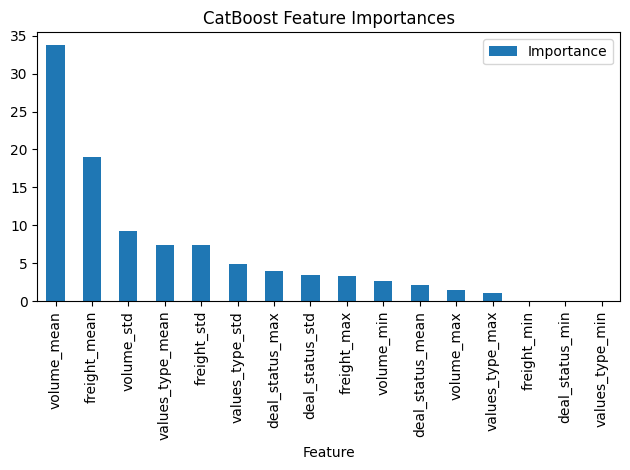

In [26]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Агрегация данных для статичных признаков на основе последовательности последних 12 месяцев
def aggregate_features(row, freight_cols, volume_cols, deal_status_cols, values_type_cols):
    features = []
    for cols in [freight_cols, volume_cols, deal_status_cols, values_type_cols]:
        values = row[cols].values.astype('float32')
        features.extend([values.mean(), values.std(), values.min(), values.max()])
    return features

# Применение функции агрегации и создание выборки
freight_cols = volumes_sorted_with_interests.filter(like='Провозная плата').columns
volume_cols = volumes_sorted_with_interests.filter(like='Объем перевозок(тн)').columns
deal_status_cols = volumes_sorted_with_interests.filter(like='Состояние').columns
values_type_cols = volumes_sorted_with_interests.filter(like='Ссылка').columns

data = []
targets = []
client_ids = []

for _, row in volumes_sorted_with_interests.iterrows():
    features = aggregate_features(row, freight_cols, volume_cols, deal_status_cols, values_type_cols)
    target = int(row['Отток'])  # Используем отток как целевую переменную
    client_id = row['ID']
    
    data.append(features)
    targets.append(target)
    client_ids.append(client_id)

# Создаем DataFrame из признаков и целевой переменной
# Создаем DataFrame из признаков и целевой переменной
df_features = pd.DataFrame(data, columns=[
    f'{base}_{stat}' for base in ['freight', 'volume', 'deal_status', 'values_type'] for stat in ['mean', 'std', 'min', 'max']
])
df_features['Отток'] = targets
df_features['Client_ID'] = client_ids


# Разделение данных на тренировочные и тестовые
X = df_features.drop(columns=['Отток', 'Client_ID'])
y = df_features['Отток']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение CatBoost модели
catboost_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', eval_metric='AUC', verbose=100)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Оценка модели
y_pred = catboost_model.predict(X_test)
print("Отчет по CatBoost модели на тестовой выборке:")
print(classification_report(y_test, y_pred))

# Анализ важности признаков
feature_importances = catboost_model.get_feature_importance()
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Важность признаков:")
print(importance_df)

# Визуализация важности признаков
importance_df.plot(kind='bar', x='Feature', y='Importance', title="CatBoost Feature Importances")
plt.tight_layout()
plt.show()

# Опционально: сохранение результатов в Excel
output_path = "/kaggle/working/client_churn_feature_importances.xlsx"



In [27]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Список месячных колонок
freight_cols = volumes_sorted_with_interests.filter(like='Провозная плата').columns
volume_cols = volumes_sorted_with_interests.filter(like='Объем перевозок(тн)').columns
deal_status_cols = volumes_sorted_with_interests.filter(like='Состояние').columns
values_type_cols = volumes_sorted_with_interests.filter(like='Ссылка').columns

# Параметры анализа
sequence_length = 12  # Окно для последовательностей (12 месяцев)

# Перебор для прогнозирования на 1, 2, 3, 4, 5 и 6 месяцев
for prediction_period in range(1, 7):
    sequences = []
    targets = []
    client_ids = []  # Хранение ID клиентов

    for _, row in volumes_sorted.iterrows():
        # Получаем значения 
        freight = row[freight_cols].values.astype('float32')
        volumes = row[volume_cols].values.astype('float32')
        deal_status = row[volume_cols].values.astype('float32')
        values_type = row[volume_cols].values.astype('float32')
        # Объединяем данные в матрицу с 4 признаками на каждый месяц
        data = np.stack([freight, volumes, deal_status, values_type], axis=1)
        
        # Создаем последовательности длиной sequence_length и целевой признак оттока на "prediction_period" месяцев вперед
        if len(data) >= sequence_length + prediction_period:
            for i in range(len(data) - sequence_length - prediction_period + 1):
                sequences.append(data[i:i+sequence_length])
                
                # Определение метки 'Отток': 1, если нет активности в следующие "prediction_period" месяцев, иначе 0
                future_period = data[i+sequence_length:i+sequence_length+prediction_period]
                targets.append(int((future_period.sum() == 0).all()))  # 1, если все значения 0, иначе 0
                client_ids.append(row['ID'])  # Сохраняем ID клиента для каждой последовательности

    # Преобразуем в numpy массивы и указываем типы данных
    X = np.array(sequences, dtype='float32')
    y = np.array(targets, dtype='int32')
    client_ids = np.array(client_ids)

    # Разделение на обучающую, валидационную и тестовую выборки
    X_train_val, X_test, y_train_val, y_test, train_val_client_ids, test_client_ids = train_test_split(
        X, y, client_ids, test_size=0.2, random_state=42
    )
    X_train, X_val, y_train, y_val, train_client_ids, val_client_ids = train_test_split(
        X_train_val, y_train_val, train_val_client_ids, test_size=0.25, random_state=42
    )

    # Построение модели LSTM с методами для уменьшения переобучения
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(sequence_length, 4), kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        LSTM(32, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Выход для вероятности оттока
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Добавление ранней остановки
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Обучение модели на обучающей и валидационной выборках
    history = model.fit(
        X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping]
    )

    # Сохранение полной модели после обучения
    model_path = f"/kaggle/working/lstm_churn_model_{prediction_period}_months.h5"
    model.save(model_path)
    print(f"Модель сохранена в файл {model_path}")

    # Оценка модели на тестовой выборке
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"\nОтчет по LSTM модели на тестовой выборке для периода предсказания {prediction_period} месяца(ев):")
    print(classification_report(y_test, y_pred))

    # Получение вероятностей оттока на тестовой выборке
    churn_probabilities = model.predict(X_test)

    # Сопоставляем тестовые ID с вероятностями и добавляем данные из volumes_sorted
    test_results = pd.DataFrame({
        'Client_ID': test_client_ids,
        'Churn_Probability': churn_probabilities.flatten()
    })

    # Объединение результатов с исходными данными volumes_sorted на основе Client_ID
    merged_results = test_results.merge(volumes_sorted, left_on='Client_ID', right_on='ID')

    # Удаление столбцов 'Отток' и дублирующегося 'ID', перемещение 'Churn_Probability' вправо
    merged_results.drop(columns=['Отток', 'ID'], inplace=True)
    merged_results['Churn_Probability'] = merged_results.pop('Churn_Probability')

    # Сортировка по вероятности оттока
    merged_results = merged_results.sort_values(by='Churn_Probability', ascending=False)

    # Сохранение в Excel
    output_path = f"/kaggle/working/client_churn_probabilities_{prediction_period}_months.xlsx"
    with pd.ExcelWriter(output_path) as writer:
        merged_results.to_excel(writer, index=False, sheet_name=f"Churn_Probabilities_{prediction_period}M")

    print(f"Результаты сохранены в файл client_churn_probabilities_{prediction_period}_months.xlsx")


Epoch 1/10


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8345 - loss: 0.4832 - val_accuracy: 0.8648 - val_loss: 0.3666
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8547 - loss: 0.3822 - val_accuracy: 0.8614 - val_loss: 0.3500
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8602 - loss: 0.3583 - val_accuracy: 0.8648 - val_loss: 0.3461
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8645 - loss: 0.3441 - val_accuracy: 0.8658 - val_loss: 0.3398
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8592 - loss: 0.3588 - val_accuracy: 0.8664 - val_loss: 0.3369
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8628 - loss: 0.3493 - val_accuracy: 0.8661 - val_loss: 0.3366
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8679 - loss: 0.3495 - val_accuracy: 0.8651 - val_loss: 0.3354
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8720 - loss: 0.3287 - val_accuracy: 0.865

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


341/341 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8137 - loss: 0.4933 - val_accuracy: 0.8516 - val_loss: 0.3821
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8481 - loss: 0.3950 - val_accuracy: 0.8569 - val_loss: 0.3614
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8439 - loss: 0.3889 - val_accuracy: 0.8610 - val_loss: 0.3507
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8496 - loss: 0.3760 - val_accuracy: 0.8602 - val_loss: 0.3505
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8561 - loss: 0.3666 - val_accuracy: 0.8604 - val_loss: 0.3460
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8549 - loss: 0.3661 - val_accuracy: 0.8604 - val_loss: 0.3473
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8509 - loss: 0.3732 - val_accuracy: 0.8577 - val_loss: 0.3466
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8482 - loss: 0.3700 - val_accuracy: 0.857

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


323/323 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8129 - loss: 0.5026 - val_accuracy: 0.8283 - val_loss: 0.4130
Epoch 2/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8424 - loss: 0.3966 - val_accuracy: 0.8344 - val_loss: 0.3936
Epoch 3/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8334 - loss: 0.3963 - val_accuracy: 0.8370 - val_loss: 0.3863
Epoch 4/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8420 - loss: 0.3823 - val_accuracy: 0.8449 - val_loss: 0.3788
Epoch 5/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8412 - loss: 0.3813 - val_accuracy: 0.8353 - val_loss: 0.3781
Epoch 6/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8414 - loss: 0.3763 - val_accuracy: 0.8472 - val_loss: 0.3739
Epoch 7/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8362 - loss: 0.3830 - val_accuracy: 0.8425 - val_loss: 0.3728
Epoch 8/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8424 - loss: 0.3806 - val_accuracy: 0.844

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


305/305 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7702 - loss: 0.5326 - val_accuracy: 0.8311 - val_loss: 0.3959
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8259 - loss: 0.4093 - val_accuracy: 0.8321 - val_loss: 0.3825
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8361 - loss: 0.3916 - val_accuracy: 0.8373 - val_loss: 0.3775
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8288 - loss: 0.3920 - val_accuracy: 0.8314 - val_loss: 0.3765
Epoch 5/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8335 - loss: 0.3866 - val_accuracy: 0.8311 - val_loss: 0.3706
Epoch 6/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8210 - loss: 0.3975 - val_accuracy: 0.8364 - val_loss: 0.3719
Epoch 7/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8367 - loss: 0.3934 - val_accuracy: 0.8367 - val_loss: 0.3686
Epoch 8/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8374 - loss: 0.3771 - val_accuracy: 0.841

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


287/287 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7977 - loss: 0.4965 - val_accuracy: 0.8235 - val_loss: 0.4373
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8106 - loss: 0.4296 - val_accuracy: 0.8290 - val_loss: 0.3825
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8182 - loss: 0.4123 - val_accuracy: 0.8313 - val_loss: 0.3763
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8190 - loss: 0.4039 - val_accuracy: 0.8349 - val_loss: 0.3727
Epoch 5/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8169 - loss: 0.4033 - val_accuracy: 0.8290 - val_loss: 0.3725
Epoch 6/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8259 - loss: 0.3945 - val_accuracy: 0.8241 - val_loss: 0.3807
Epoch 7/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8199 - loss: 0.3983 - val_accuracy: 0.8352 - val_loss: 0.3692
Epoch 8/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8229 - loss: 0.3892 - val_accuracy: 0.836

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


269/269 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7892 - loss: 0.5138 - val_accuracy: 0.7870 - val_loss: 0.4847
Epoch 2/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8090 - loss: 0.4277 - val_accuracy: 0.8037 - val_loss: 0.4297
Epoch 3/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8109 - loss: 0.4164 - val_accuracy: 0.8037 - val_loss: 0.4197
Epoch 4/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8162 - loss: 0.4027 - val_accuracy: 0.8006 - val_loss: 0.4169
Epoch 5/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8132 - loss: 0.4006 - val_accuracy: 0.8037 - val_loss: 0.4199
Epoch 6/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8171 - loss: 0.3961 - val_accuracy: 0.8072 - val_loss: 0.4152
Epoch 7/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8183 - loss: 0.3906 - val_accuracy: 0.7950 - val_loss: 0.4165
Epoch 8/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8103 - loss: 0.3995 - val_accuracy: 0.802

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Список месячных колонок для провозной платы и объема перевозок
freight_cols = volumes_sorted.filter(like='Провозная плата').columns
volume_cols = volumes_sorted.filter(like='Объем перевозок(тн)').columns

# Параметры анализа
sequence_length = 12  # Окно для последовательностей (12 месяцев)

# Перебор для прогнозирования на 1, 2, 3, 4, 5 и 6 месяцев
for prediction_period in range(1, 7):
    sequences = []
    targets = []
    client_ids = []  # Хранение ID клиентов

    for _, row in volumes_sorted.iterrows():
        # Получаем значения провозной платы и объемов перевозок
        freight = row[freight_cols].values.astype('float32')
        volumes = row[volume_cols].values.astype('float32')
        
        # Объединяем данные в матрицу с двумя признаками на каждый месяц
        data = np.stack([freight, volumes], axis=1)
        
        # Создаем последовательности длиной sequence_length и целевой признак оттока на "prediction_period" месяцев вперед
        if len(data) >= sequence_length + prediction_period:
            for i in range(len(data) - sequence_length - prediction_period + 1):
                sequences.append(data[i:i+sequence_length])
                
                # Определение метки 'Отток': 1, если нет активности в следующие "prediction_period" месяцев, иначе 0
                future_period = data[i+sequence_length:i+sequence_length+prediction_period]
                targets.append(int((future_period.sum() == 0).all()))  # 1, если все значения 0, иначе 0
                client_ids.append(row['ID'])  # Сохраняем ID клиента для каждой последовательности

    # Преобразуем в numpy массивы и указываем типы данных
    X = np.array(sequences, dtype='float32')
    y = np.array(targets, dtype='int32')
    client_ids = np.array(client_ids)

    # Разделение на обучающую, валидационную и тестовую выборки
    X_train_val, X_test, y_train_val, y_test, train_val_client_ids, test_client_ids = train_test_split(
        X, y, client_ids, test_size=0.2, random_state=42
    )
    X_train, X_val, y_train, y_val, train_client_ids, val_client_ids = train_test_split(
        X_train_val, y_train_val, train_val_client_ids, test_size=0.25, random_state=42
    )

    # Построение модели LSTM с методами для уменьшения переобучения
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(sequence_length, 2), kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        LSTM(32, kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Выход для вероятности оттока
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Добавление ранней остановки
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Обучение модели на обучающей и валидационной выборках
    history = model.fit(
        X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping]
    )

    # Сохранение полной модели после обучения
    model_path = f"/kaggle/working/lstm_churn_model_{prediction_period}_months.h5"
    model.save(model_path)
    print(f"Модель сохранена в файл {model_path}")

    # Оценка модели на тестовой выборке
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"\nОтчет по LSTM модели на тестовой выборке для периода предсказания {prediction_period} месяца(ев):")
    print(classification_report(y_test, y_pred))

    # Получение вероятностей оттока на тестовой выборке
    churn_probabilities = model.predict(X_test)

    # Сопоставляем тестовые ID с вероятностями и добавляем данные из volumes_sorted
    test_results = pd.DataFrame({
        'Client_ID': test_client_ids,
        'Churn_Probability': churn_probabilities.flatten()
    })

    # Объединение результатов с исходными данными volumes_sorted на основе Client_ID
    merged_results = test_results.merge(volumes_sorted, left_on='Client_ID', right_on='ID')

    # Удаление столбцов 'Отток' и дублирующегося 'ID', перемещение 'Churn_Probability' вправо
    merged_results.drop(columns=['Отток', 'ID'], inplace=True)
    merged_results['Churn_Probability'] = merged_results.pop('Churn_Probability')

    # Сортировка по вероятности оттока
    merged_results = merged_results.sort_values(by='Churn_Probability', ascending=False)

    # Сохранение в Excel
    output_path = f"/kaggle/working/client_churn_probabilities_{prediction_period}_months.xlsx"
    with pd.ExcelWriter(output_path) as writer:
        merged_results.to_excel(writer, index=False, sheet_name=f"Churn_Probabilities_{prediction_period}M")

    print(f"Результаты сохранены в файл client_churn_probabilities_{prediction_period}_months.xlsx")